In [2]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as  dt
import pandas as pd
import talib
import matplotlib.pyplot as plt
import datetime

In [7]:
ticker = 'RELIANCE'
print(ticker)
ticker = ticker + '.NS'
a1 = yf.Ticker(ticker)
df = a1.history(period="30d" , interval = '5m')

high_1 = 1000
low_1 = -1000
data = df
position=0
position_index=0
target= 1
stoploss= 0.5
realised_pnl=0
number_of_trades=0
pnl_l = 0
pnl_h = 0
pnl_l1 = []
position_l = []
tradebook = {}

for i in range(len(data)):
    if (data.index[i].time()  == datetime.time(10,0)):
        high_1 = df.Close.rolling(9).max()[df.index[i]]
        low_1 = df.Close.rolling(9).min()[df.index[i]] 

    if ((position == 0)&( data.Close.loc[data.index[i]]> high_1 ) & (data.index[i].time() > dt.time(10,0))& (data.index[i].time() < dt.time(12,0))):
            position_time=data.index[i].time()
            position_index=data.index[i]
            entry_price = data.loc[data.index[i+1],'Open']
            position = 1
            print('long position at {}'.format(data.index[i]))
            number_of_trades=number_of_trades+1
            position_l.append(position_index)
            continue
    if ((position == 0)&( data.Close.loc[data.index[i]]< low_1 ) & (data.index[i].time() > dt.time(10,0))& (data.index[i].time() < dt.time(12,0))):
            position_time=data.index[i].time()
            position_index=data.index[i]
            entry_price = data.loc[data.index[i+1],'Open']
            position = -1
            print('short position at {}'.format(data.index[i]))
            number_of_trades=number_of_trades+1
            position_l.append(position_index)
            continue


    if (position_index!=0):

        pnl = ((data.loc[data.index[i],'Close']- entry_price)/entry_price)*(position)*100  
#         print('PNL is {}'.format(pnl))


    if ((position != 0) and ((pnl  >target) or (pnl < -stoploss))):
        realised_pnl=realised_pnl+pnl
        pnl_l1.append(pnl)
        position=0
        print('position exited at {}'.format(data.index[i].time()))
        position_index=0
        tradebook[number_of_trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :data.index[i], 'pnl' :pnl}
        print(pnl)
    if ((position != 0) and (data.index[i].time() > dt.time(15,0))):
        realised_pnl=realised_pnl+pnl
        pnl_l1.append(pnl)
        tradebook[number_of_trades] = {'entry_time' :position_time ,'entry_price': entry_price ,'long_short': position ,'exit_time' :data.index[i], 'pnl' :pnl}
        position=0
        print('position covered at {}'.format(data.index[i].time()))
        position_index=0
        print(pnl)
        pnl = 0
print(realised_pnl)


RELIANCE
short position at 2020-12-30 10:25:00+05:30
position exited at 10:50:00
-0.5032853400037937
long position at 2020-12-30 10:55:00+05:30
position covered at 15:05:00
0.075248318532599
short position at 2020-12-31 10:50:00+05:30
position covered at 15:05:00
0.5777913370747875
long position at 2021-01-01 10:20:00+05:30
position covered at 15:05:00
-0.16076117417106256
short position at 2021-01-04 10:05:00+05:30
position exited at 13:45:00
-0.587013598970263
short position at 2021-01-05 10:15:00+05:30
position covered at 15:05:00
0.23855198905468802
short position at 2021-01-06 10:05:00+05:30
position exited at 13:05:00
1.0231375020083546
short position at 2021-01-07 10:20:00+05:30
position covered at 15:05:00
0.3724489516908808
long position at 2021-01-08 10:30:00+05:30
position covered at 15:05:00
0.689475738259399
short position at 2021-01-11 10:15:00+05:30
position exited at 14:15:00
1.0913706729695205
short position at 2021-01-12 10:10:00+05:30
position exited at 11:10:00
-0.8

In [8]:
tradebook_df = pd.DataFrame(tradebook).T
tradebook_df['Profit'] = (tradebook_df['entry_price']*tradebook_df['pnl'])/100

In [9]:
tradebook_df

,entry_time,entry_price,long_short,exit_time,pnl,Profit
1,10:25:00,1977,0,2020-12-30 10:50:00+05:30,-0.503285,-9.94995
2,10:55:00,1993.4,1,2020-12-30 15:05:00+05:30,0.0752483,1.5
3,10:50:00,1999,-1,2020-12-31 15:05:00+05:30,0.577791,11.55
4,10:20:00,1990.5,1,2021-01-01 15:05:00+05:30,-0.160761,-3.19995
5,10:05:00,1976.1,0,2021-01-04 13:45:00+05:30,-0.587014,-11.6
6,10:15:00,1970.2,-1,2021-01-05 15:05:00+05:30,0.238552,4.69995
7,10:05:00,1945,0,2021-01-06 13:05:00+05:30,1.02314,19.9
8,10:20:00,1919.7,-1,2021-01-07 15:05:00+05:30,0.372449,7.1499
9,10:30:00,1921.75,1,2021-01-08 15:05:00+05:30,0.689476,13.25
10,10:15:00,1919.6,0,2021-01-11 14:15:00+05:30,1.09137,20.95


In [10]:
realised_pnl

5.425290782124038

In [11]:
number_of_trades

38

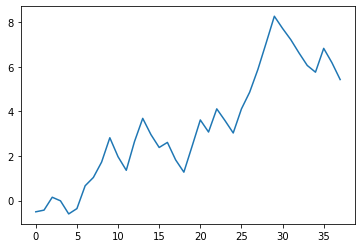

In [12]:
plt.plot()
plt.plot(np.cumsum(pnl_l1))

# Drawdown

In [13]:
tradebook_df['Cumulative'] = tradebook_df['Profit'].cumsum()
tradebook_df['HighValue'] = tradebook_df['Cumulative'].cummax()

tradebook_df['Drawdown'] = tradebook_df['Cumulative'] - tradebook_df['HighValue']

In [14]:
max_drawdown = min(tradebook_df['Drawdown'])
max_drawdown*-1

54.39990234375